<a href="https://colab.research.google.com/github/natalia2000-jpg/Machine-learning/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_10_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Εργασία 10 -Clustering

όνομα:Ναταλία Ταμβακίδου ΑΕΜ:200

#Ερώτημα 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
id_columns=['Unnamed: 0','track_id','artists','album_name','track_name']
df_ids=df[id_columns].copy()
df_ids.head()

,Unnamed: 0,track_id,artists,album_name,track_name
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On


In [4]:
df_features=df.drop(columns=id_columns)
df_features.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df_encoded=pd.get_dummies(df_features,columns=['track_genre'])
df_encoded.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,...,False,False,False,False,False,False,False,False,False,False
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,...,False,False,False,False,False,False,False,False,False,False
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,...,False,False,False,False,False,False,False,False,False,False
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,...,False,False,False,False,False,False,False,False,False,False
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,...,False,False,False,False,False,False,False,False,False,False


#Ερώτημα 2

In [6]:
print(df_encoded.describe())

          popularity   duration_ms   danceability         energy  \
count  114000.000000  1.140000e+05  114000.000000  114000.000000   
mean       33.238535  2.280292e+05       0.566800       0.641383   
std        22.305078  1.072977e+05       0.173542       0.251529   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        5.309140      -8.258960       0.637553       0.084652   
std         3.559987       5.029337       0.480709       0.105732   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       

Σχόλιο: θα κανονικοποιήσουμε τα χαρακτηριστικά που παίρνουν συνεχής τιμές όπως:
* popularity
* duration_ms
* tempo
* key
* time_signature
Ο λόγος που εφαρμόζουμε αυτή τη διαδικασία είναι για να αποφύγουμε την υπερβολική επίδραση χαρακτηριστικών που έχουν μεγάλες κλίμακες τιμών (π.χ. duration_ms, tempo) στα αποτελέσματα του clustering, ενώ στην πραγματικότητα μπορεί να μην είναι τόσο σημαντικά.

Επιπλέον, παρατηρούμε ότι αρκετά χαρακτηριστικά παρουσιάζουν ακραίες τιμές (outliers). Για τον λόγο αυτό, η χρήση του Min-Max scaling δεν είναι κατάλληλη, καθώς τα ακραία σημεία θα επηρεάζουν δυσανάλογα τη μετατροπή.
Συνεπώς, η κανονικοποίηση θα γίνει με χρήση z-score (StandardScaler), που έχει πιο σταθερά και αξιόπιστα αποτελέσματα για αλγορίθμους clustering.



In [7]:
from sklearn.preprocessing import StandardScaler
numeric_cols = [
    'popularity',
    'duration_ms',
    'loudness',
    'danceability',
    'energy',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'time_signature'
]

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [8]:
df_encoded['key'] = df_encoded['key'].replace(-1, 'unknown')
df_encoded = pd.get_dummies(df_encoded, columns=['key'])

#Ερώτημα 3

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [10]:
k_values=[2,3,5,7,10,15,20]
sse=[]

In [11]:
for k in k_values:
  kmeans=KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300,random_state=0)
  kmeans.fit(df_encoded)
  sse.append(kmeans.inertia_)

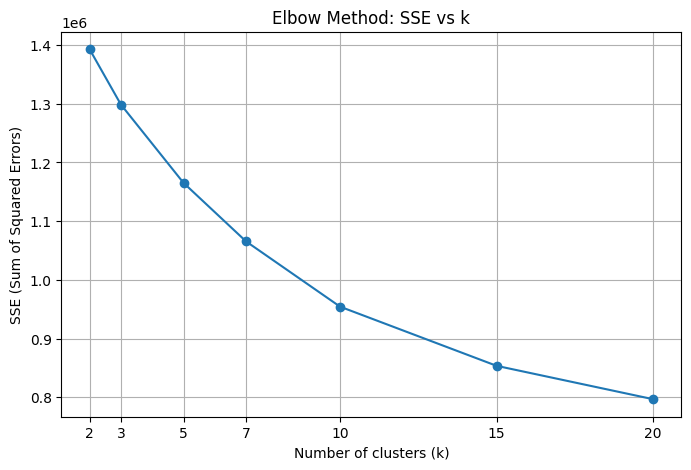

In [12]:
plt.figure(figsize=(8,5))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method: SSE vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#Ερώτημα 4

Παρατηρούμε απο την οποτικοποιήση της μεθόδου Elbow ότι η επιλογή k=10 είναι η βέλτιστη διότι,η καμπύλη παρουσιάζει μια έντονη καθοδική πορεία απο το k=2 εως το k=10.Στο σημείο όπου k=10 εντοπίζεται η τελευταία γωνία πριν η κλίση της συνάρστησης αρχίσει να γίνεται οριζόντια.


In [13]:
kmeans=KMeans(n_clusters=10,init='k-means++',n_init=10,max_iter=300,random_state=0)
kmeans.fit(df_encoded)
labels=kmeans.labels_
df_ids['cluster']=labels

#Ερώτημα 5

In [14]:
df_ids['track_genre']=df_features['track_genre']

In [15]:
dominant_genre_pct=[]

In [16]:
for cluster in sorted(df_ids['cluster'].unique()):
  cluster_df=df_ids[df_ids['cluster']==cluster]
  top_genre_count=cluster_df['track_genre'].value_counts()
  pct=top_genre_count/len(cluster_df)*100
  dominant_genre_pct.append(pct)

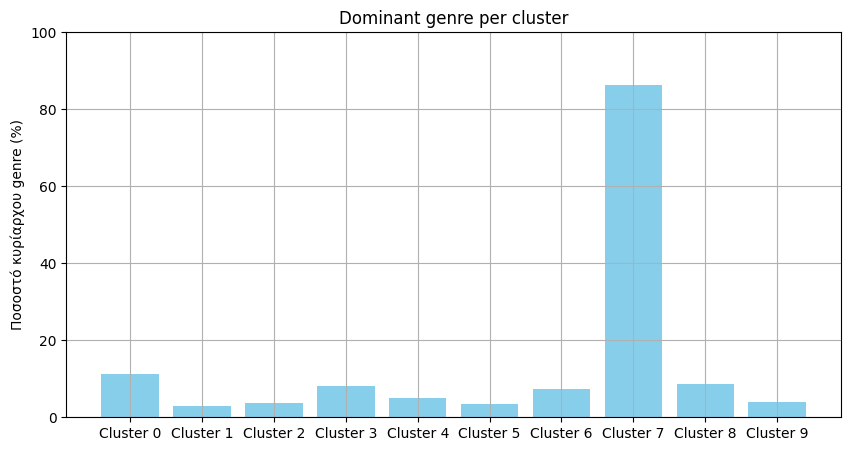

In [17]:
plot_heights = [series.iloc[0] for series in dominant_genre_pct]

plt.figure(figsize=(10,5))
plt.bar(range(len(plot_heights)), plot_heights, color='skyblue')
plt.xticks(range(len(plot_heights)), [f'Cluster {i}' for i in range(len(plot_heights))])
plt.ylabel('Ποσοστό κυρίαρχου genre (%)')
plt.title('Dominant genre per cluster')
plt.ylim(0,100)
plt.grid(True)
plt.show()

#Ερώτημα 6

In [18]:

my_song_name ="It's My Life"
my_song_artist = "Bon Jovi"

song_idx = df_ids[(df_ids['track_name']==my_song_name) &(df_ids['artists']==my_song_artist)].index[0]

song_cluster = df_ids.loc[song_idx, 'cluster']
print(f"Το τραγούδι '{my_song_name}' του {my_song_artist} ανήκει στο Cluster {song_cluster}")

cluster_songs = df_ids[(df_ids['cluster']==song_cluster) &
                       ~((df_ids['track_name']==my_song_name) &
                         (df_ids['artists']==my_song_artist))].index

song_vector = df_encoded.loc[song_idx].values.astype(float)
cluster_vectors = df_encoded.loc[cluster_songs].values.astype(float)


Το τραγούδι 'It's My Life' του Bon Jovi ανήκει στο Cluster 1


In [19]:

distances = np.linalg.norm(cluster_vectors - song_vector, axis=1)

distances_dict = dict(zip(cluster_songs.tolist(), distances))
distances_dict.pop(int(song_idx), None)


In [20]:
top3_idx = sorted(distances_dict, key=distances_dict.get)[:3]
print("\nTop-3 προτεινόμενα τραγούδια:")
for idx in top3_idx:
    track = df_ids.loc[idx, 'track_name']
    artist = df_ids.loc[idx, 'artists']
    print(f"- {track} - {artist}")


Top-3 προτεινόμενα τραγούδια:
- You Give Love A Bad Name - Bon Jovi
- Ausländer - Rammstein
- Livin' On A Prayer - Bon Jovi


#Ερώτημα 7

In [21]:
from sklearn.metrics.pairwise import cosine_distances

In [22]:
my_song_name ="It's My Life"
my_song_artist = "Bon Jovi"


song_idx = df_ids[(df_ids['track_name']==my_song_name) & (df_ids['artists']==my_song_artist)].index[0]

song_cluster = df_ids.loc[song_idx, 'cluster']
print(f"Το τραγούδι '{my_song_name}' του {my_song_artist} ανήκει στο Cluster {song_cluster}")


cluster_songs = df_ids[(df_ids['cluster']==song_cluster) & ~((df_ids['track_name']==my_song_name) & (df_ids['artists']==my_song_artist))].index

song_vector = df_encoded.loc[song_idx].values.astype(float).reshape(1, -1)
cluster_vectors = df_encoded.loc[cluster_songs].values.astype(float)

distances = cosine_distances(cluster_vectors, song_vector).flatten()
distances_dict = dict(zip(cluster_songs.tolist(), distances))

top3_idx = sorted(distances_dict, key=distances_dict.get)[:3]

print("\nTop-3 προτεινόμενα τραγούδια (Cosine Distance):")
for idx in top3_idx:
    track = df_ids.loc[idx, 'track_name']
    artist = df_ids.loc[idx, 'artists']
    print(f"- {track} - {artist}")


Το τραγούδι 'It's My Life' του Bon Jovi ανήκει στο Cluster 1

Top-3 προτεινόμενα τραγούδια (Cosine Distance):
- You Give Love A Bad Name - Bon Jovi
- Livin' On A Prayer - Bon Jovi
- Ausländer - Rammstein


#Ερώτημα 8

In [23]:
from sklearn.decomposition import PCA
import hdbscan
!pip install hdbscan

# Μείωση διαστάσεων
pca = PCA(n_components=20, random_state=42)
df_encoded_pca = pca.fit_transform(df_encoded)


hdb = hdbscan.HDBSCAN(min_cluster_size=100, metric='euclidean')
hdb_labels = hdb.fit_predict(df_encoded_pca)

df_ids['hdbscan_cluster'] = hdb_labels

n_clusters_hdb = len(set(hdb_labels)) - (1 if -1 in hdb_labels else 0)
n_noise_hdb = list(hdb_labels).count(-1)

print(f"HDBSCAN (με PCA): Βρέθηκαν {n_clusters_hdb} clusters και {n_noise_hdb} θορυβώδη δείγματα (-1)")


HDBSCAN (με PCA): Βρέθηκαν 7 clusters και 60695 θορυβώδη δείγματα (-1)


Σχόλιο: Για να επιταγχύνουμε την διαδικασία εκτέλεσης του αλγορίθμου **HDBSCAN** χρησιμοποιήσαμε **PCA** για την μείωση των διαστάσεων.Το αποτέλεσμα έδειξε οτι δημιουργήθηκαν 7 clusters ενώ ένα μεγάλο μέρος κομματιών χαρακτηρίστηκε ως θόρυβος, δηλαδή δεν εντάχθηκαμ σε κάποιο cluster.

Σε σύγκριση με τον **K-means** όπου μέσου της μεθόδου Elbow δημιουργήσαμε 10 cluster, O **HDBSCAN**  επειδή ξεχωρίζει τα κομμάτια που είνα outliers και παρέχει μια πιο ρεαλιστική και φυσική ομαδοποιήση των μουσικών κομματιών.